# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [9]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender']=="Male"]
female_df =  data.loc[data['Gender']=="Female"]

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007
print("men",male_df.describe(),'\n')
print('women',female_df.describe())

men             Height       Weight
count  5000.000000  5000.000000
mean     69.026346   187.020621
std       2.863362    19.781155
min      58.406905   112.902939
25%      67.174679   173.887767
50%      69.027709   187.033546
75%      70.988744   200.357802
max      78.998742   269.989699 

women             Height       Weight
count  5000.000000  5000.000000
mean     63.708774   135.860093
std       2.696284    19.022468
min      54.263133    64.700127
25%      61.894441   122.934096
50%      63.730924   136.117583
75%      65.563565   148.810926
max      73.389586   202.237214


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

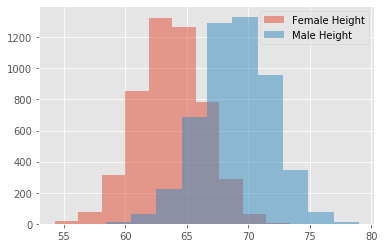

In [15]:
# Your code here
plt.hist(female_df['Height'],bins=10,alpha=0.5,label='Female Height')
plt.hist(male_df['Height'],bins=10,alpha=0.5,label='Male Height')
plt.legend(loc='upper right')
plt.show()

In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

[ 0.04412275 -0.03308702  0.24307712 -0.02520921  0.01096098  0.15824811
 -0.09092324 -0.05916367  0.01876032 -0.032987   -0.11927646 -0.02048765
 -0.03588289  0.06034716 -0.16647885 -0.0700179   0.1151391   0.1857331
 -0.15111796  0.06448475 -0.09806079 -0.08568532 -0.08718792 -0.04225079
  0.09964398  0.07124213  0.00591442 -0.03633109  0.00032888 -0.01059304
  0.07930533 -0.06315716 -0.00061949 -0.01010676 -0.00523082  0.02492177
  0.01976601  0.13348486 -0.00868756  0.15615323 -0.0305853  -0.04777314
  0.01007382  0.03554385  0.02696124  0.12919634  0.1139343   0.04944404
 -0.03363363 -0.01006143  0.1413398   0.02212541 -0.13107731 -0.06895652
 -0.05775132  0.11522048 -0.0107164   0.22601068  0.06566195  0.01248068
 -0.04357039  0.09721793 -0.02407111 -0.08241235  0.05681327  0.00127583
  0.11890607 -0.00735933 -0.2859688   0.07893664 -0.18777409  0.15387561
  0.18213647 -0.04270314 -0.11647019 -0.1397074   0.08726546 -0.02021182
 -0.05983599 -0.02434197  0.20885147  0.03469193  0.

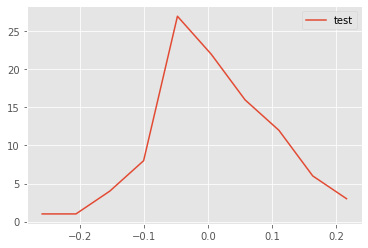

In [45]:
def density(x):
    y,bins = np.histogram(x)
    x = np.zeros(y.size)
    for i in range(y.size):
        x[i] = .5*(bins[i]+bins[i+1])
    return x,y


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
print(s)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

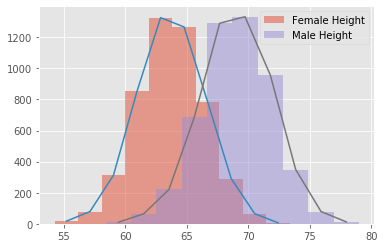

In [50]:
# Your code here 
Fx,Fy = density(np.array([x for x in female_df['Height']]))
Mx,My = density(np.array([x for x in male_df['Height']]))
plt.hist(female_df['Height'],bins=10,alpha=0.5,label='Female Height')
plt.plot(Fx,Fy)
plt.hist(male_df['Height'],bins=10,alpha=0.5,label='Male Height')
plt.plot(Mx,My)
plt.legend(loc='upper right')
plt.show()

## Repeat the above exercise for male and female weights

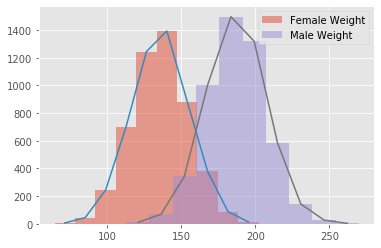

In [51]:
# Your code here 
Fx,Fy = density(np.array([x for x in female_df['Weight']]))
Mx,My = density(np.array([x for x in male_df['Weight']]))
plt.hist(female_df['Weight'],bins=10,alpha=0.5,label='Female Weight')
plt.plot(Fx,Fy)
plt.hist(male_df['Weight'],bins=10,alpha=0.5,label='Male Weight')
plt.plot(Mx,My)
plt.legend(loc='upper right')
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

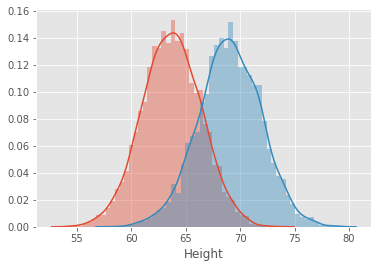

In [53]:
# Code for heights here
import seaborn as sns
sns.distplot(female_df['Height'])
sns.distplot(male_df['Height'])

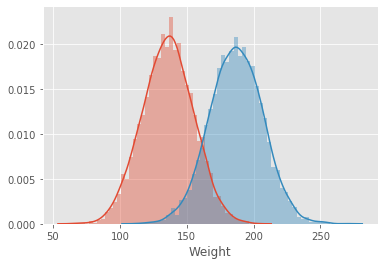

In [54]:
# Code for weights here
sns.distplot(female_df['Weight'])
sns.distplot(male_df['Weight'])

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.